# KMeans

<img src="fireblaze.jpg" width=250 height=200 />

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('Mall_Customers.csv')

In [63]:
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [64]:
d1=df[['Annual_Income_(k$)','Spending_Score']]

In [65]:
d1

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### implentation of KMeans

In [16]:
from sklearn.cluster import KMeans

In [17]:
k1=KMeans(n_clusters=4)

In [18]:
k1

KMeans(n_clusters=4)

In [19]:
k1.fit(d1)

KMeans(n_clusters=4)

In [20]:
k1.labels_

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [21]:
centroids=k1.cluster_centers_

In [22]:
centroids

array([[86.53846154, 82.12820513],
       [87.        , 18.63157895],
       [48.26      , 56.48      ],
       [26.30434783, 20.91304348]])

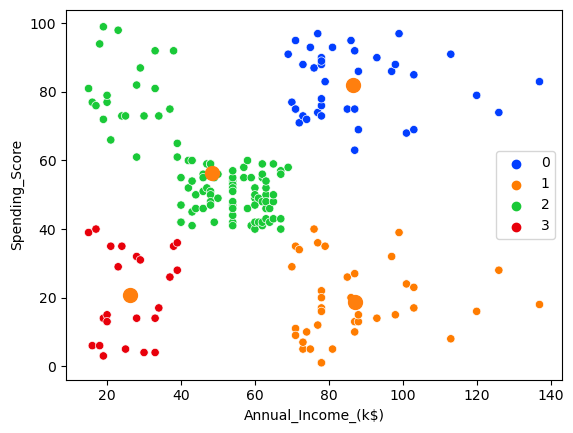

In [23]:
sns.scatterplot(data=d1,x='Annual_Income_(k$)',y='Spending_Score',hue=k1.labels_,palette='bright')
plt.scatter(centroids[:,0],centroids[:,1],s=100)
plt.show()

### silhouette_score     

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
silhouette_score(d1,k1.labels_)

0.4931963109249047

### Elbow Method

In [26]:
wcss=[]
for i in range(1,40):
    k2=KMeans(n_clusters=i,init='k-means++')
    k2.fit(d1)
    wcss.append(k2.inertia_)

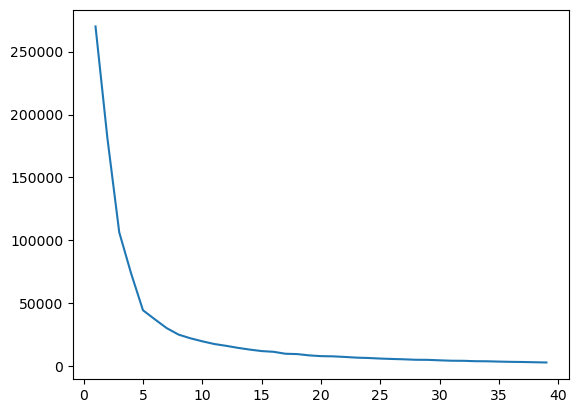

In [27]:
plt.plot(range(1,40),wcss)
plt.show()

In [28]:
k3=KMeans(n_clusters=5,init='k-means++')

In [29]:
labels=k3.fit_predict(d1)

In [30]:
c=k3.cluster_centers_

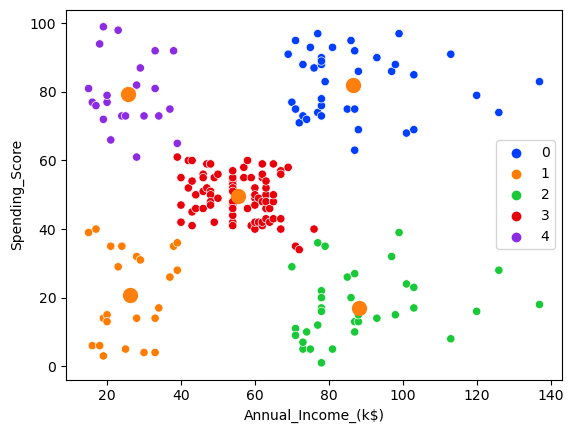

In [31]:
sns.scatterplot(data=d1,x='Annual_Income_(k$)',y='Spending_Score',hue=labels,palette='bright')
plt.scatter(c[:,0],c[:,1],s=100)

In [32]:
silhouette_score(d1,labels)

0.553931997444648

In [33]:
##################################################################################################

In [34]:
d1

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


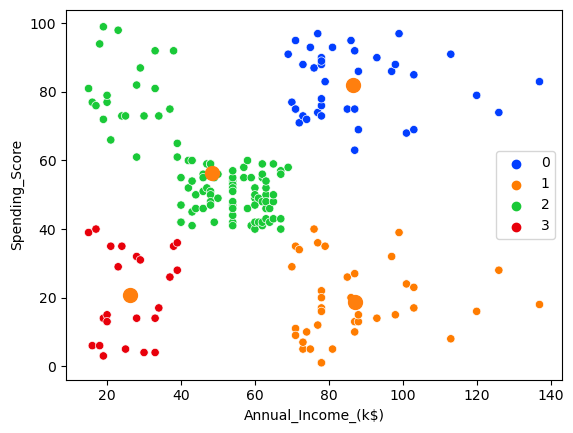

In [35]:
sns.scatterplot(data=d1,x='Annual_Income_(k$)',y='Spending_Score',hue=k1.labels_,palette='bright')
plt.scatter(centroids[:,0],centroids[:,1],s=100)

In [36]:
#############################################################################################################

## Hierarchical Clustering

In [68]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage

In [69]:
linkage=linkage(d1,method='ward')

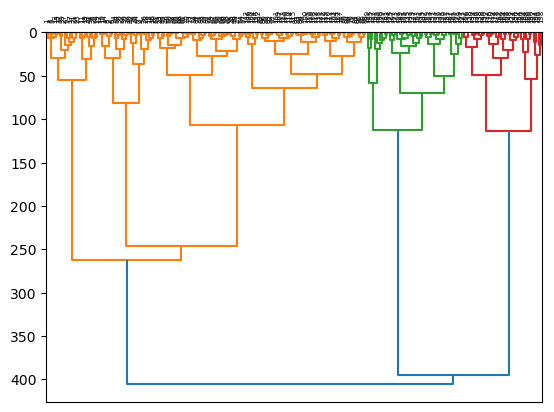

In [72]:
hierarchy.dendrogram(linkage,orientation='bottom')
plt.show()

In [81]:
from sklearn.cluster import AgglomerativeClustering

In [82]:
ac=AgglomerativeClustering(n_clusters=2)

In [83]:
ac.fit(d1)

AgglomerativeClustering()

In [84]:
ac.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

<Axes: xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

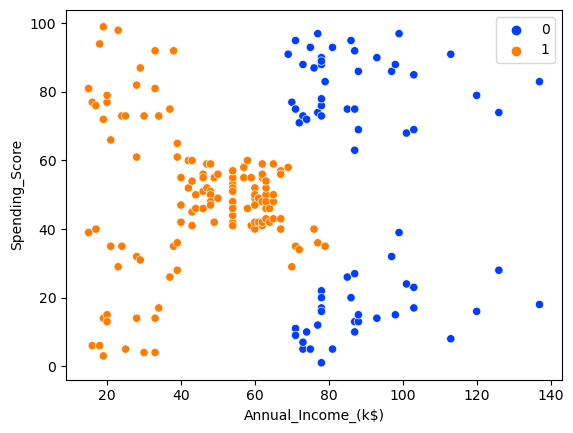

In [85]:
sns.scatterplot(data=d1,x='Annual_Income_(k$)',y='Spending_Score',hue=ac.labels_,palette='bright')

In [86]:
from sklearn.metrics import silhouette_score

In [87]:
silhouette_score(d1,ac.labels_)

0.36706444723912895

In [44]:
#############################################################################################################

# DBSCAN

#### Density Base Spatial Clustering of Application with Noise(DBSCAN)

In [88]:
from sklearn.cluster import DBSCAN

In [89]:
dbscan=DBSCAN(eps=9,min_samples=3)

In [90]:
dbscan

DBSCAN(eps=9, min_samples=3)

In [91]:
dbscan.fit(d1)

DBSCAN(eps=9, min_samples=3)

In [92]:
dbscan.labels_

array([ 0,  1,  2,  1,  0,  1,  2,  3,  2,  1,  2,  3,  2,  1,  2,  1,  0,
        1,  0,  3,  0,  1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  1,  2,  1,
        2,  1,  2,  1,  4,  1,  4,  1,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  4,  5,  4,  5,  6,  5,  6,  5,  4,  5,  6,  5,
        6,  5,  6,  5,  6,  5,  4,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,
        5,  6,  5,  6,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,  5,  6,  5,
        6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6, -1,  6,
       -1,  6,  5,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [93]:
silhouette_score(d1,dbscan.labels_)

0.475053701963407

<Axes: xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

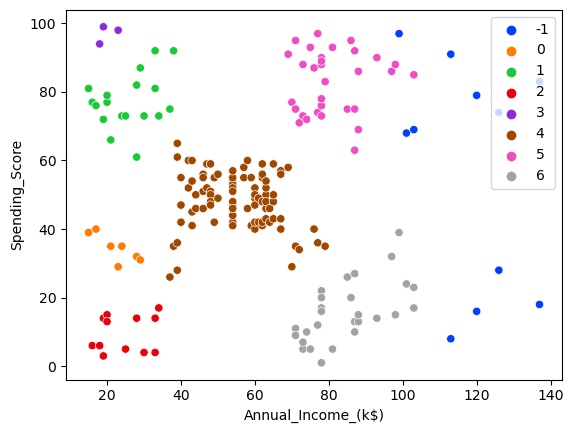

In [94]:
sns.scatterplot(data=d1,x='Annual_Income_(k$)',y='Spending_Score',hue=dbscan.labels_,palette='bright')

### Note:

- KMeans is a centroid-based clustering algorithm, while Hierarchical Clustering builds a hierarchy of clusters. DBSCAN is a density-based algorithm.
- Silhouette score helps assess the quality of clustering.(0 TO 1)
- The Elbow Method assists in choosing the optimal number of clusters for KMeans.
- Hierarchical Clustering uses linkage and dendrogram for visualization.
- DBSCAN identifies clusters based on density and noise.